## Lendo arquivos Excel com Pandas

O Pandas tem uma função direta para ler planilhas: [`pandas.read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

No entanto, bibliotecas adicionais podem ser necessárias, dependendo do formato do arquivo. Segundo a página de referência citada:

- arquivos `xls` usam a biblioteca [`xlrd`](https://xlrd.readthedocs.io/en/latest/)
- arquivos `xlsx` usam a biblioteca [`openpyxl`](https://openpyxl.readthedocs.io/en/stable/)
- arquivos OpenDocument, como `ods` usam [`odfpy`](https://pypi.org/project/odfpy/)  

Caso ocorram erros ao ler documentos com estas extensões, as páginas citadas tem instruções de instalação.

Vamos usar arquivos `xlsx` abaixo, então inicialmente instalamos a biblioteca:
- `pip install openpyxl`

In [1]:
import pandas as pd

A planilha usada aqui é o dataset `iris` do *scikit-learn* previamente salvo como xlsx.

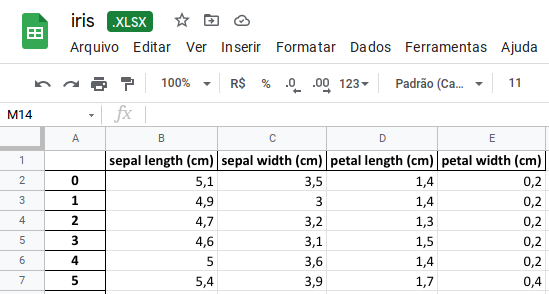

In [2]:
dados = pd.read_excel('iris.xlsx', index_col=0)
# Como temos uma coluna no arquivo excel que já é o index, passamos index_col=0.
# Se não houver índice, não é necessário este parâmetro, o pandas irá criar um index.
dados.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Note que esta é um arquivo simples, com apenas uma planilha, e cujos dados estão organizados de maneira clara.  

Caso haja mais de uma planilha, a primeira apenas será importada, a não ser que seja informado o parâmetro `sheet_name`, onde informamos o nome da planilha a ser importada, ou sua posição, contando a partir de zero.

Abaixo um exemplo de arquivo com várias planilhas:

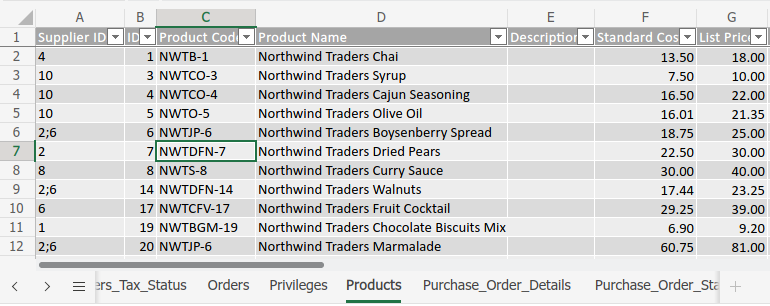

In [3]:
products = pd.read_excel('NorthwindTradersTables.xlsx', sheet_name='Products')
products.head(5)

,Supplier IDs,ID,Product Code,Product Name,Description,Standard Cost,List Price,Reorder Level,Target Level,Quantity Per Unit,Discontinued,Minimum Reorder Quantity,Category,Attachments
0,4,1,NWTB-1,Northwind Traders Chai,NaN,13.5000,18.00,10,40,10 boxes x 20 bags,False,10.0,Beverages,NaN
1,10,3,NWTCO-3,Northwind Traders Syrup,NaN,7.5000,10.00,25,100,12 - 550 ml bottles,False,25.0,Condiments,NaN
2,10,4,NWTCO-4,Northwind Traders Cajun Seasoning,NaN,16.5000,22.00,10,40,48 - 6 oz jars,False,10.0,Condiments,NaN
3,10,5,NWTO-5,Northwind Traders Olive Oil,NaN,16.0125,21.35,10,40,36 boxes,False,10.0,Oil,NaN
4,2;6,6,NWTJP-6,Northwind Traders Boysenberry Spread,NaN,18.7500,25.00,25,100,12 - 8 oz jars,False,25.0,"Jams, Preserves",NaN


Neste arquivo a planilhas `Orders` é a décima primeira, então para localizá-la por número, passamos `10` (já que a primeiro é zero)

In [4]:
orders = pd.read_excel('NorthwindTradersTables.xlsx', sheet_name=10)
orders.head(5)

,Order ID,Employee ID,Customer ID,Order Date,Shipped Date,Shipper ID,Ship Name,Ship Address,Ship City,Ship State/Province,Ship ZIP/Postal Code,Ship Country/Region,Shipping Fee,Taxes,Payment Type,Paid Date,Notes,Tax Rate,Tax Status,Status ID
0,30,9,27,2006-01-15,2006-01-22,2.0,Karen Toh,789 27th Street,Las Vegas,NV,99999,USA,200,0,Check,2006-01-15,NaN,0,NaN,3
1,31,3,4,2006-01-20,2006-01-22,1.0,Christina Lee,123 4th Street,New York,NY,99999,USA,5,0,Credit Card,2006-01-20,NaN,0,NaN,3
2,32,4,12,2006-01-22,2006-01-22,2.0,John Edwards,123 12th Street,Las Vegas,NV,99999,USA,5,0,Credit Card,2006-01-22,NaN,0,NaN,3
3,33,6,8,2006-01-30,2006-01-31,3.0,Elizabeth Andersen,123 8th Street,Portland,OR,99999,USA,50,0,Credit Card,2006-01-30,NaN,0,NaN,3
4,34,9,4,2006-02-06,2006-02-07,3.0,Christina Lee,123 4th Street,New York,NY,99999,USA,4,0,Check,2006-02-06,NaN,0,NaN,3


### Observação
Todos os exemplo acima usaram planilhas bem organizadas, mas é possível encontrar arquivos mal estruturados, ou dos quais não sabemos previamente a estrutura. Nestes casos há outras estratégias que podem ser usadas, que serão detalhadas em outros *notebooks*